In [1]:
#importing Required Libraries for data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import folium
%matplotlib inline
import seaborn as sns


In [2]:
airbnb = pd.read_csv("listings.csv")
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3109,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,3631,Anne,NaN,Observatoire,48.83191,2.31870,Entire home/apt,110,2,9,2019-10-24,0.11,1,253,0,7511409139079
1,5396,Rental unit in Paris · ★4.56 · Studio · 1 bed ...,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,140,1,354,2023-09-02,2.05,1,207,44,7510402838018
2,7397,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,140,10,337,2023-08-31,2.23,1,211,25,7510400829623


Over viewing the file before performaning any operations on it

In [3]:
len(airbnb)

67942

In [4]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

The data includes details such as unique identifiers (id, host_id), textual information about the accommodations and hosts (name, host_name), geographic location (neighbourhood_group, neighbourhood, latitude, longitude), room type (room_type), price (price), minimum stay requirements (minimum_nights), customer reviews (number_of_reviews, reviews_per_month, number_of_reviews_ltm), host-related information (calculated_host_listings_count), availability (availability_365), and a field related to licenses (license).

In [5]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions

airbnb.drop(['id','host_name','last_review','neighbourhood_group'], axis=1 ,inplace=True)

#examing the changes

airbnb.head(3)

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,3631,Observatoire,48.83191,2.31870,Entire home/apt,110,2,9,0.11,1,253,0,7511409139079
1,Rental unit in Paris · ★4.56 · Studio · 1 bed ...,7903,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,140,1,354,2.05,1,207,44,7510402838018
2,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,2626,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,140,10,337,2.23,1,211,25,7510400829623


Removing Null Columns

In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67942 entries, 0 to 67941
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            67942 non-null  object 
 1   host_id                         67942 non-null  int64  
 2   neighbourhood                   67942 non-null  object 
 3   latitude                        67942 non-null  float64
 4   longitude                       67942 non-null  float64
 5   room_type                       67942 non-null  object 
 6   price                           67942 non-null  int64  
 7   minimum_nights                  67942 non-null  int64  
 8   number_of_reviews               67942 non-null  int64  
 9   reviews_per_month               53185 non-null  float64
 10  calculated_host_listings_count  67942 non-null  int64  
 11  availability_365                67942 non-null  int64  
 12  number_of_reviews_ltm           

The dataset is contains 67,942 entries and 15 columns. It includes information such as accommodation names, host IDs, geographic coordinates, room types, pricing, minimum stay requirements, customer reviews, and host-related details. Some columns contain missing values, and the dataset has a total memory usage of approximately 7.8 MB.

# Exploratory Data Analysis

In [7]:
# Let's see what hosts (IDs) have the most listings on the Airbnb platform and are taking advantage of this service

top_host = airbnb['host_id'].value_counts().head(10)
top_host  


host_id
314994947    566
50502817     382
33889201     262
50978178     255
460047164    205
7642792      199
26981054     165
458533553    151
440295601    142
51567288     131
Name: count, dtype: int64

In [8]:
# Returning to our dataset, we can verify our findings using the existing column 'calculated_host_listings_count.'

top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

566

In [9]:
# Defining the figure size for upcoming visualizations.

sns.set(rc = {'figure.figsize' : (10, 8)})
sns.set_style = 'white'

In [10]:
# Create a DataFrame for the top hosts with the most listings on Airbnb.

top_host_df = pd.DataFrame(top_host.reset_index())
top_host_df.rename(columns={'host_id': 'Host_ID' , 'count': "Listing_count"}, inplace=True)
top_host_df


,Host_ID,Listing_count
0,314994947,566
1,50502817,382
2,33889201,262
3,50978178,255
4,460047164,205
5,7642792,199
6,26981054,165
7,458533553,151
8,440295601,142
9,51567288,131


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '7642792'),
  Text(1, 0, '26981054'),
  Text(2, 0, '33889201'),
  Text(3, 0, '50502817'),
  Text(4, 0, '50978178'),
  Text(5, 0, '51567288'),
  Text(6, 0, '314994947'),
  Text(7, 0, '440295601'),
  Text(8, 0, '458533553'),
  Text(9, 0, '460047164')])

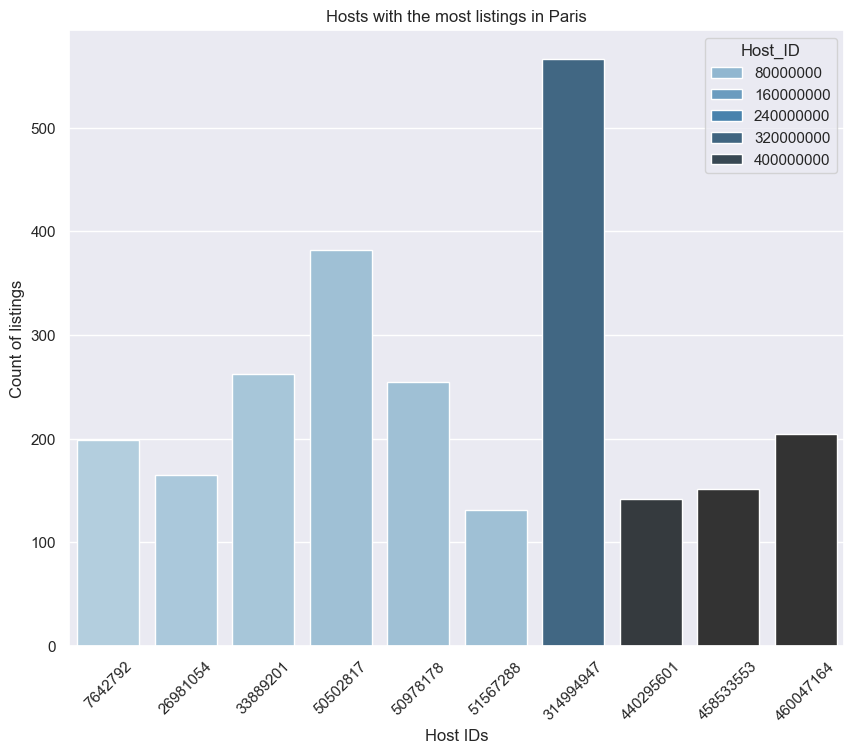

In [11]:
viz_1=sns.barplot(x="Host_ID", y="Listing_count", data=top_host_df,
                 hue= "Host_ID" ,palette='Blues_d')
viz_1.set_title('Hosts with the most listings in Paris')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
plt.xticks(rotation=45)

Fascinatingly, there's a well-balanced distribution among the top 10 hosts with the most listings, with the leading host having over 500+ listings.

In [12]:
# Let's explore some intriguing unique categorical values.

# Examining the unique values of the 'neighbourhood_group' column, which will be valuable for later analysis.
unique_neighbourhood_groups = airbnb['neighbourhood'].unique()
unique_neighbourhood_groups

array(['Observatoire', 'Hôtel-de-Ville', 'Opéra', 'Louvre', 'Popincourt',
       'Buttes-Montmartre', 'Gobelins', 'Luxembourg', 'Buttes-Chaumont',
       'Entrepôt', 'Panthéon', 'Reuilly', 'Bourse', 'Élysée',
       'Batignolles-Monceau', 'Vaugirard', 'Ménilmontant',
       'Palais-Bourbon', 'Passy', 'Temple'], dtype=object)

In [13]:
# Checking the unique values in the 'neighbourhood' column for futher analysis.
unique_neighbourhoods = len(airbnb.neighbourhood.unique())
unique_neighbourhoods


20

In [14]:
# Create a list of neighborhood names to filter
neighborhoods_to_filter = ['Observatoire', 'Hôtel-de-Ville', 'Opéra', 'Louvre', 'Popincourt',
                           'Buttes-Montmartre', 'Gobelins', 'Luxembourg', 'Buttes-Chaumont',
                           'Entrepôt', 'Panthéon', 'Reuilly', 'Bourse', 'Élysée',
                           'Batignolles-Monceau', 'Vaugirard', 'Ménilmontant',
                           'Palais-Bourbon', 'Passy', 'Temple']

# Filtering neighborhoods
neighborhood_dfs = []
for neighborhood_name in neighborhoods_to_filter:
    sub_neighborhood = airbnb.loc[airbnb['neighbourhood'] == neighborhood_name]
    price_sub = sub_neighborhood[['price']]
    neighborhood_dfs.append(price_sub)


In [15]:
# Create an empty list to append later with price distributions for each neighborhood
p_l_b_n_2 = []

# Create a list with known neighborhood names
nei_list = ['Observatoire', 'Hôtel-de-Ville', 'Opéra', 'Louvre', 'Popincourt',
            'Buttes-Montmartre', 'Gobelins', 'Luxembourg', 'Buttes-Chaumont',
            'Entrepôt', 'Panthéon', 'Reuilly', 'Bourse', 'Élysée',
            'Batignolles-Monceau', 'Vaugirard', 'Ménilmontant',
            'Palais-Bourbon', 'Passy', 'Temple']

# Create a for loop to get statistics for price ranges and append them to our empty list
for x, neighborhood_name in zip(neighborhood_dfs, nei_list):
    i = x.describe(percentiles=[0.25, 0.50, 0.75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats', 'price': neighborhood_name}, inplace=True)
    p_l_b_n_2.append(i)

# Create a final DataFrame for a clear view
stat_df = pd.concat([df.set_index('Stats') for df in p_l_b_n_2], axis=1)

stat_df



,Observatoire,Hôtel-de-Ville,Opéra,Louvre,Popincourt,Buttes-Montmartre,Gobelins,Luxembourg,Buttes-Chaumont,Entrepôt,Panthéon,Reuilly,Bourse,Élysée,Batignolles-Monceau,Vaugirard,Ménilmontant,Palais-Bourbon,Passy,Temple
Stats,,,,,,,,,,,,,,,,,,,,
min,15.0,20.0,11.0,32.0,9.0,8.0,10.0,20.0,10.00,20.0,10.0,16.0,10.0,12.0,15.0,13.0,10.0,10.0,8.00,9.0
25%,71.0,110.0,98.5,130.0,75.0,70.0,65.0,110.0,64.25,80.0,94.0,70.0,113.0,125.0,78.0,80.0,62.0,110.0,99.25,107.0
50%,105.0,180.0,152.0,220.0,111.0,103.0,99.0,195.0,94.00,120.0,150.0,100.0,180.0,229.0,118.0,120.0,90.0,194.0,160.00,179.0
75%,165.0,295.5,264.0,362.5,170.0,150.0,150.0,336.5,131.00,190.0,253.0,150.0,300.0,412.0,197.5,199.0,125.0,336.5,300.00,280.0
max,8790.0,2800.0,10770.0,9970.0,15000.0,21564.0,10000.0,9999.0,30000.00,10000.0,5900.0,11600.0,9266.0,9999.0,9999.0,11600.0,5000.0,63594.0,12000.00,11600.0


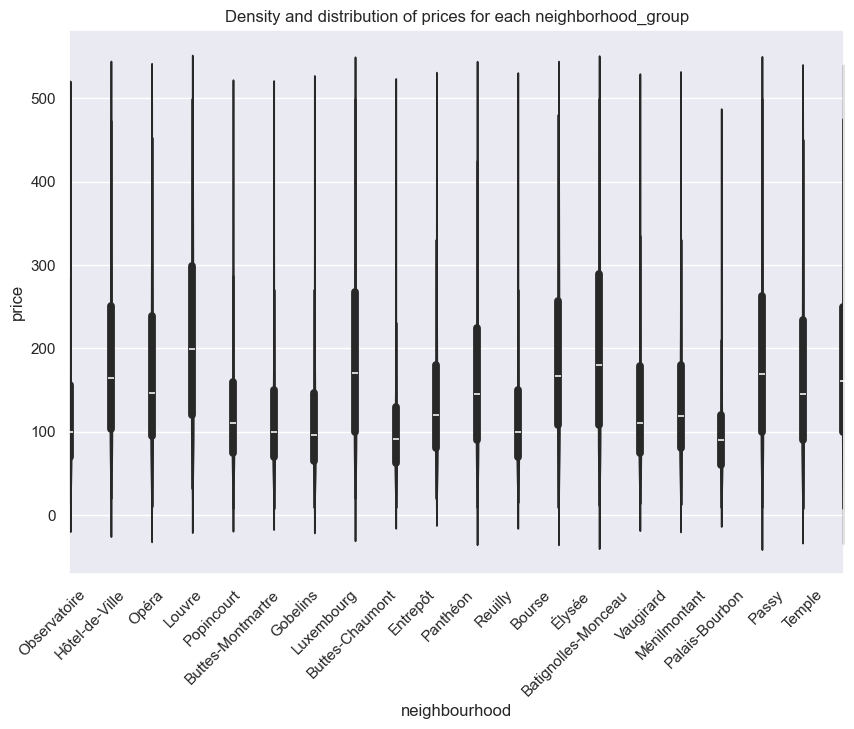

In [16]:
# We can see from our statistical table that we have some extreme values. Therefore, we need to remove them for better visualization.

# Creating a sub-dataframe with prices less than 500
sub_6 = airbnb[airbnb.price < 500]

# Using a violinplot to showcase the density and distribution of prices
viz_2 = sns.violinplot(data=sub_6, x='neighbourhood', y='price', width=1, hue="neighbourhood", palette='Reds',dodge=True)
viz_2.set_title('Density and distribution of prices for each neighborhood_group')
plt.xticks(rotation=45, ha='right')  # You can adjust the rotation and alignment as needed
plt.subplots_adjust(bottom=0.2) 


With the statistical table and violin plot, we can gain valuable insights into the distribution of Airbnb listing prices in various neighborhoods of Paris. First and foremost, it's evident that the borough of Louvre exhibits the highest range of listing prices, with an average price of €220 per night, closely followed by Élysée with an average of €195. On the other hand, Gobelins and Buttes-Chaumont appear to have relatively more affordable options, with average prices around €90 and €94 per night, respectively. The distribution and density of prices align with our expectations; Louvre and Élysée, known for their prime locations, command higher prices, while Gobelins and Buttes-Chaumont offer more budget-friendly options, making them attractive choices for travelers with various budgets.






In [17]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

neighbourhood
Buttes-Montmartre      7555
Popincourt             6081
Vaugirard              5154
Entrepôt               4776
Batignolles-Monceau    4527
Passy                  3914
Buttes-Chaumont        3866
Ménilmontant           3829
Opéra                  3335
Temple                 2993
Name: count, dtype: int64

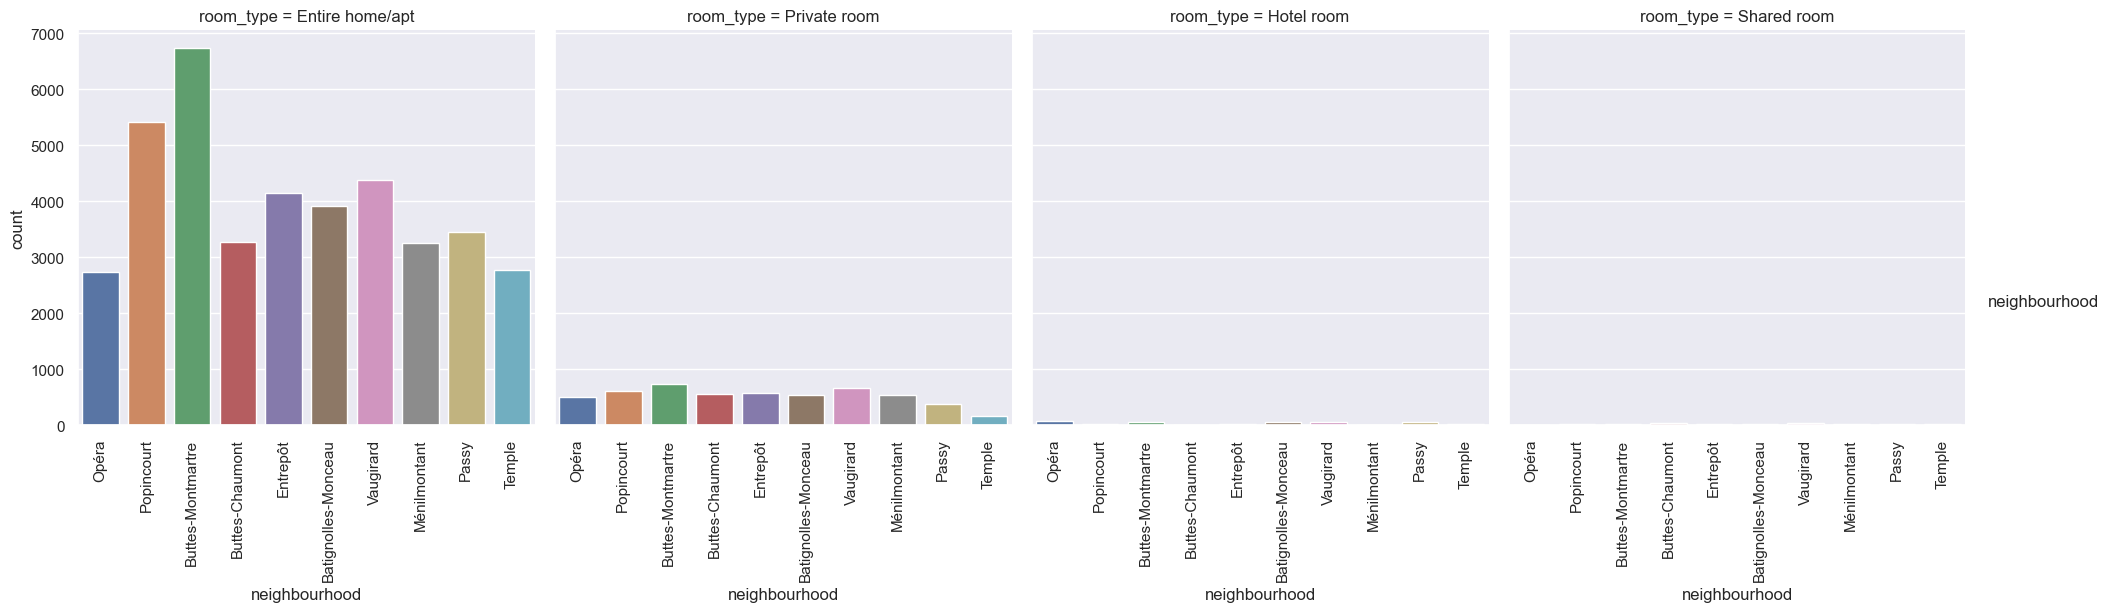

In [18]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Buttes-Montmartre','Popincourt',
    'Vaugirard',
    'Entrepôt',
    'Batignolles-Monceau',
    'Passy',
    'Buttes-Chaumont',
    'Ménilmontant',
    'Opéra','Temple'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

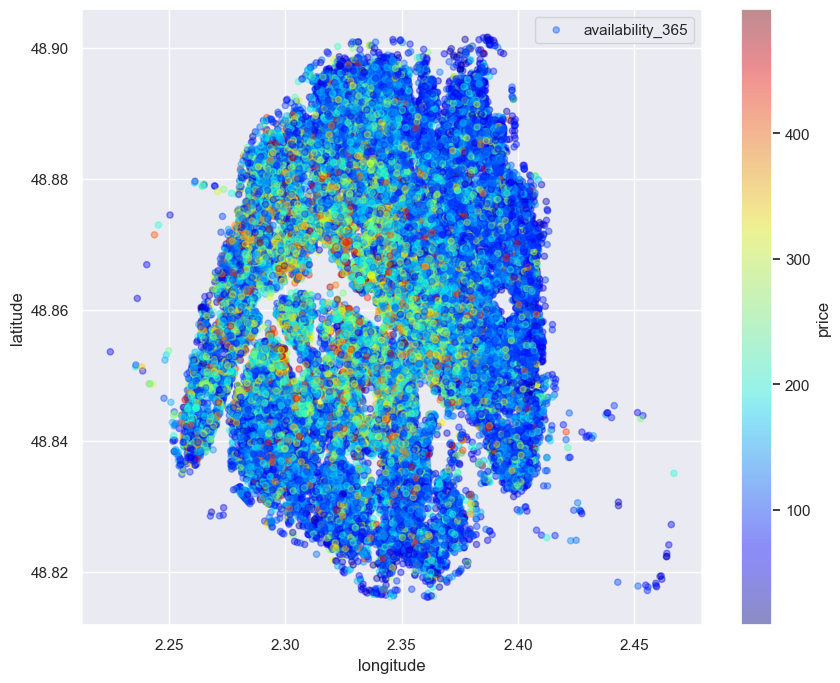

In [29]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

In [30]:
#let's grab 10 most reviewed listings in Paris
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
21280,Boutique hotel in Paris · ★4.85 · 1 bedroom · ...,98020850,Bourse,48.86958,2.33246,Hotel room,466,1,2580,45.45,8,308,191,NaN
14599,Boutique hotel in Paris · ★4.73 · 1 bedroom · ...,84901734,Entrepôt,48.86989,2.36027,Private room,204,1,2444,31.70,5,48,807,7511001895566
26640,Boutique hotel in Paris · ★4.30 · 1 bedroom · ...,264483496,Entrepôt,48.88137,2.36199,Hotel room,207,1,2017,44.01,4,202,955,NaN
30468,Hostel in Paris · ★4.70 · 1 bedroom · 1 bed · ...,309707704,Reuilly,48.83903,2.39251,Shared room,60,1,1745,37.99,10,109,657,538867607RCS Paris
24891,Boutique hotel in Paris · ★4.43 · Studio · 1 b...,98087989,Buttes-Montmartre,48.88869,2.34793,Hotel room,362,1,1506,27.42,4,312,393,NaN
820,Rental unit in Paris · ★4.78 · 1 bedroom · 1 b...,3125405,Popincourt,48.85416,2.38722,Private room,58,1,1098,8.44,1,0,185,NaN
1221,Rental unit in Paris · ★4.87 · 1 bedroom · 1 b...,6811343,Louvre,48.86486,2.34186,Private room,149,1,1006,8.11,1,178,123,7510100699052
24653,Boutique hotel in Paris · ★4.42 · 1 bedroom · ...,183489963,Buttes-Chaumont,48.88720,2.37297,Private room,157,1,986,17.71,9,355,1,NaN
29420,Boutique hotel in Paris · ★4.81 · 1 bedroom · ...,293659364,Élysée,48.87465,2.31717,Private room,186,1,938,20.50,7,339,440,NaN
26796,Boutique hotel in Paris · ★4.74 · 1 bedroom · ...,264941340,Panthéon,48.85275,2.34427,Hotel room,301,1,867,16.80,10,299,56,Exempt - hotel-type listing


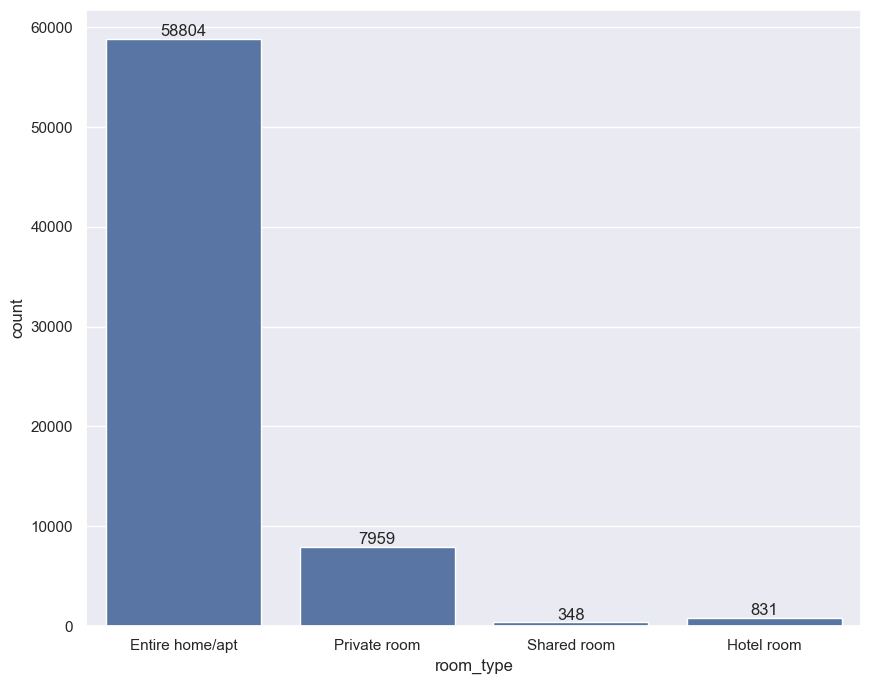

In [21]:
ax = sns.countplot(x= "room_type", data= airbnb)
for rmtype in ax.containers:
    ax.bar_label(rmtype)  

The majority of listings in Paris are for entire apartments or houses, while private rooms are the second most common option. Shared rooms and hotel rooms are relatively less common, suggesting that Parisian Airbnb guests prefer more private and self-contained accommodations.

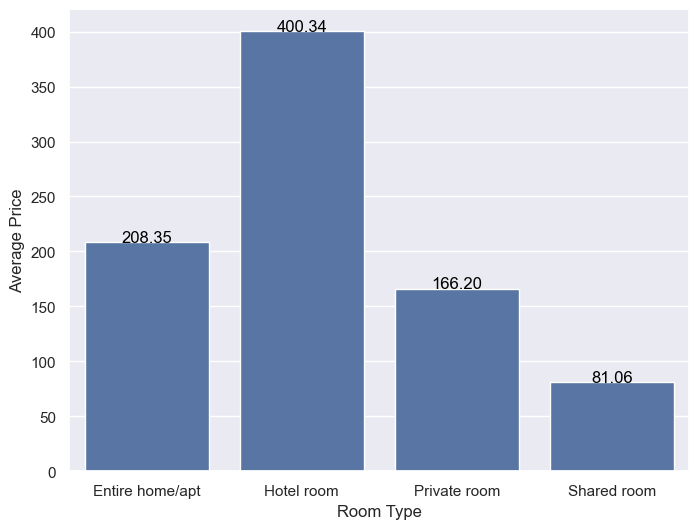

In [22]:
# Calculating the average price for each room type
average_prices = airbnb.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(8, 6))
room = sns.barplot(x="room_type", y="price", data=average_prices )

# Adding labels to the bars with the average prices
for index, row in average_prices.iterrows():
    room.text(index, row['price'], f'{row["price"]:.2f}', color='black', ha="center")

room.set_ylabel("Average Price") 
room.set_xlabel("Room Type")  

plt.show()



The data shows that private rooms are the most expensive option, followed by entire home/apartments and shared rooms. Hotels offer the most budget-friendly choice among the options. These average prices can help travelers make informed decisions when choosing their accommodations based on their budget and preferences.

## Conclusion